In [2]:
import json
import glob
import pandas as pd
import numpy as np 
from matplotlib.patches import Ellipse
import datetime
datetime = datetime.datetime
import matplotlib.pyplot as plt 
import requests
import seaborn as sns
import scipy as sp

Funtions to plot the graphs 

In [3]:

def plot_psd(fxx,pxx,name):
    fig =plt.figure(figsize=(20, 7))
    plt.plot(fxx, pxx, color="k", linewidth=0.3)
    plt.title(name)

    # create interpolation function for plotting frequency bands
    psd_f = sp.interpolate.interp1d(fxx, pxx)

    # setup frequency bands for plotting
    x_vlf = np.linspace(0, 0.04, 100)
    x_lf = np.linspace(0.04, 0.15, 100)
    x_hf = np.linspace(0.15, 0.4, 100)
    plt.gca().fill_between(x_vlf, psd_f(x_vlf), alpha=0.2, color="#A651D8", label="VLF")
    plt.gca().fill_between(x_lf, psd_f(x_lf), alpha=0.2, color="#51A6D8", label="LF")
    plt.gca().fill_between(x_hf, psd_f(x_hf), alpha=0.2, color="#D8A651", label="HF")

    plt.gca().set_xlim(0, 0.4)
    plt.gca().set_ylim(0)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("psd(S^2/hz)")
    plt.legend()
    plt.show()
def plot(data,data1):
    bins = np.arange(np.min(data)-5,np.max(data)+5,2)
    counts,bins = np.histogram(data, bins, density=False)
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.hist(data,bins=bins,density=False, align='left', facecolor='blue', edgecolor='black')
    plt.xlabel('HR (beats/min)')
    plt.subplot(1,2,2)
    bins = np.arange(np.min(data1)-10,np.max(data1)+10,10)
    counts,bins = np.histogram(data1, bins, density=False)
    plt.hist(data1,bins=bins,density=False, align='left', facecolor='blue', edgecolor='black')
    plt.xlabel('rr(ms)')
    plt.show()
def plot_poinfrom_dict(result):
      
    rr_n = result['rr(n)(ms)']
    rr_n1 = result['rr(n+1)(ms)']
    sd1 =result['sd1(ms)']
    sd2 = result['sd2(ms)']
    m = result['mean']
    min_rr = result['min_rr']
    max_rr = result['max_rr']

    plt.figure(figsize=(7, 7))
    plt.title("Poincare plot")

    plt.scatter(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")
    
    plt.show()

In [4]:
time1=[]
loc1=[]
x = glob.glob('D:/internship/Data/abhishek/mar 11/*.txt')
for i in x:
  #print(i)
  j = (i.split('/')[-1].split('__')[-1].split(' '))

  if len(j[0]) == 5:
    t = '0'+j[0] 
  else:
    t = j[0]
  end  = j[1].split('_')

  loc1.append(i)
  time1.append(datetime.strptime(t+end[0], '%I%M%S%p'))
  #print(t+end[0],datetime.strptime(t+end[0], '%I%M%S%p'))

data = {"loc":loc1,'time':time1}
D1 = pd.DataFrame(data=data)
D1.head(20)
D1 = D1.sort_values(by="time")
D1.head(40)
hr =[]
acc =[]
rri = []
time = []
dic_data = {} 
for i in list(D1['loc'][3:]):
  f = open(i,'r')
  try:
    print(i)
    Data = json.load(f)
    for i in range(0,len(Data['data'])):
      hr.append(Data['data'][i]['extras']['HR'])
      rri.append(Data['data'][i]['extras']['rri'])
      acc.append((Data['data'][i]['extras']['acc']))
      time1 =datetime.fromtimestamp(Data['data'][i]['extras']['time']/1e3)
      time.append(time1)
      dic_data[time1] = Data['data'][i]['extras']['rri']
  except Exception  as e:
#     print(i)
    error = str(e)
    val = int(error.split(' ')[-3]) -1
    print(val)
    f = open(i,'r')
    data = (f.read())
    #print(data[:val])
    dic = json.loads(data[:val])
    for i in range(0,len(dic['data'])):
      hr.append(dic['data'][i]['extras']['HR'])
      acc.append((dic['data'][i]['extras']['acc']))
      rri.append(dic['data'][i]['extras']['rri'])
      
      time1 =datetime.fromtimestamp(dic['data'][i]['extras']['time']/1e3)
      time.append(time1)
      dic_data[time1] = dic['data'][i]['extras']['rri']


D:/internship/Data/abhishek/mar 11\ECGDataJSON__124800 AM_124839 AM.txt
79917
D:/internship/Data/abhishek/mar 11\ECGDataJSON__124840 AM_125631 AM.txt
969308
D:/internship/Data/abhishek/mar 11\ECGDataJSON__125632 AM_125644 AM.txt
25217
D:/internship/Data/abhishek/mar 11\ECGDataJSON__125645 AM_125703 AM.txt
36953
D:/internship/Data/abhishek/mar 11\ECGDataJSON__125704 AM_125711 AM.txt
14469
D:/internship/Data/abhishek/mar 11\ECGDataJSON__125712 AM_11215 AM.txt
1870016
D:/internship/Data/abhishek/mar 11\ECGDataJSON__11216 AM_11223 AM.txt
14235
D:/internship/Data/abhishek/mar 11\ECGDataJSON__11224 AM_11903 AM.txt
819430
D:/internship/Data/abhishek/mar 11\ECGDataJSON__11904 AM_11919 AM.txt
30477
D:/internship/Data/abhishek/mar 11\ECGDataJSON__11920 AM_13343 AM.txt
1776587
D:/internship/Data/abhishek/mar 11\ECGDataJSON__13344 AM_13359 AM.txt
30716
D:/internship/Data/abhishek/mar 11\ECGDataJSON__13400 AM_14319 AM.txt
1155041
D:/internship/Data/abhishek/mar 11\ECGDataJSON__14320 AM_14343 AM.txt

considering rri interval for 5 mins.

In [5]:

rr = [i for i in (np.array(list(dic_data.values())).flatten()) if i !=0][:300]
rr = list(map(int,rr))
len(rr)

300

## Input list of rr(ms) with data type int.
Any lentgh of rr can be given. min :5 minutes(preffered)

In [30]:
dic = {'short': (4,16),'long':(17,64)}
data = {'params': dic, 'arr': json.dumps(rr)}


In [31]:
r = requests.get('http://192.168.0.111:8080/',json=data)


In [27]:
rsult =  json.loads(r.content.decode("utf-8"))
rsult.keys()

dict_keys(['result', 'status'])

In [28]:
results = rsult['result']

In [51]:

obj = open('data1.json', 'w')
obj.write(json.dumps((results),  indent=4))
obj.close()

# Time domain Parameter 

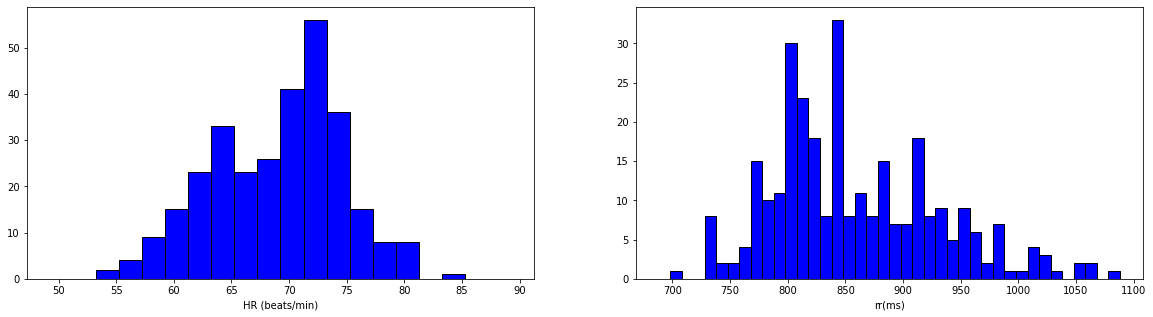

In [29]:
plot(results['time_domain']['hist_data_hr'],results['time_domain']['hist_data_rr_ms'])


In [11]:
results['time_domain']['params']


{'mean_rr ms': 863.0366666666666,
 'mean_hr 1/(min)': 69.98855108930373,
 'std_rr ms': 71.96509794492205,
 'std_hr 1/(min)': 5.624563379871976,
 'Rmssd (ms)': 79.65573921129386,
 'NN50 (count)': 148.0,
 'PNN50 %': 0.49498327759197325,
 'triangle_index': 11.538461538461538}

# freq Domain parameter

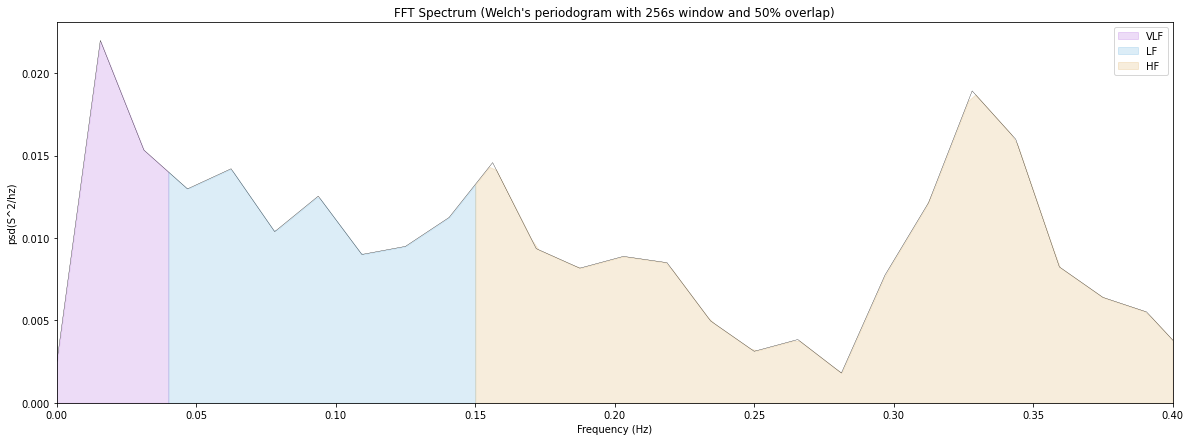

In [12]:
name= "FFT Spectrum (Welch's periodogram with 256s window and 50% overlap)"
plot_psd(results['weltch_psd']['fxx'],results['weltch_psd']['pxx/(s^2hz)'],name)

In [13]:
results['weltch_psd']['params']

{'Power_VLF (ms2)': 481.9306317772607,
 'Power_LF (ms2)': 1057.9592234060794,
 'Power_HF (ms2)': 2001.5814870064921,
 'Power_Total (ms2)': 3541.4713421898323,
 'Power_VLF %': 13.608203630959325,
 'Power_LF %': 29.8734373705789,
 'Power_HF %': 56.51835899846178,
 'ratio_LF/HF': 0.5285616550082769,
 'Peak_VLF (Hz)': 0.015625,
 'Peak_LF (Hz)': 0.0625,
 'Peak_HF (Hz)': 0.328125,
 'Fraction_LF (nu)': 34.57902095584197,
 'Fraction_HF (nu)': 65.42097904415803}

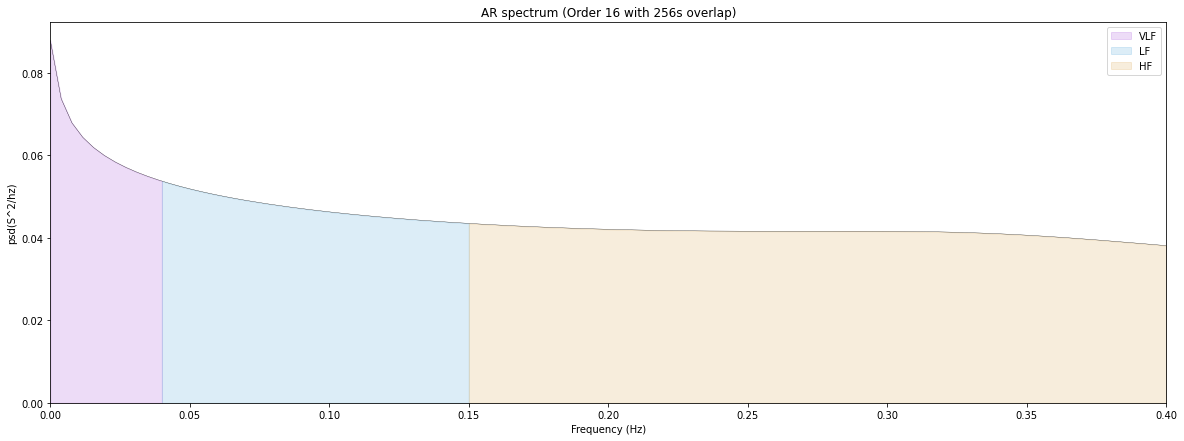

In [14]:
name = 'AR spectrum (Order 16 with 256s overlap)'
plot_psd(results['ar_psd']['fxx'],results['ar_psd']['pxx/(s^2hz)'],name)

In [15]:
results['ar_psd']['params']

{'Power_VLF (ms2)': 2424.0074110442274,
 'Power_LF (ms2)': 4944.225636740029,
 'Power_HF (ms2)': 10263.918894095608,
 'Power_Total (ms2)': 17632.151941879863,
 'Power_VLF %': 13.747654960292897,
 'Power_LF %': 28.0409654648932,
 'Power_HF %': 58.211379574813904,
 'ratio_LF/HF': 0.4817093439411558,
 'Peak_VLF (Hz)': 0.0,
 'Peak_LF (Hz)': 0.04263565891472868,
 'Peak_HF (Hz)': 0.1511627906976744,
 'Fraction_LF (nu)': 32.510380386741105,
 'Fraction_HF (nu)': 67.4896196132589}

# non -linear analysis 

In [16]:
results['pinocare']['sd2(ms)']

84.69893405789286

In [17]:
results['pinocare']['sd1(ms)']

56.32474616417078

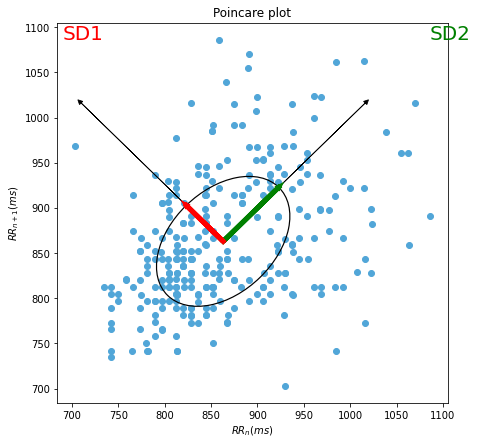

In [18]:
plot_poinfrom_dict(results['pinocare'])
                   

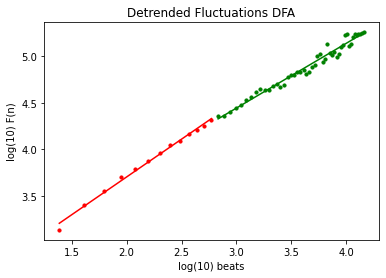

In [19]:
plt.scatter(results['dfa']['plot']['long']['scatter']['x_beats'],results['dfa']['plot']['long']['scatter']['y_logF(n)'],c ='green',s=10)
plt.plot(results['dfa']['plot']['long']['plot_line']['x_beats'],results['dfa']['plot']['long']['plot_line']['y_logF(n)'],c='green')
plt.scatter(results['dfa']['plot']['short']['scatter']['x_beats'],results['dfa']['plot']['short']['scatter']['y_logF(n)'],c ='red',s=10)
plt.plot(results['dfa']['plot']['short']['plot_line']['x_beats'],results['dfa']['plot']['short']['plot_line']['y_logF(n)'],c='red')
plt.xlabel('log(10) beats')
plt.ylabel('log(10) F(n)')
plt.title('Detrended Fluctuations DFA')
plt.show()

In [20]:
results['dfa']['plot'].keys()

dict_keys(['long', 'short'])

In [21]:
results['dfa']['Detrended Fluctuations alpha1']

0.8081613056731448

In [22]:
results['dfa']['Detrended Fluctuations alpha2']

0.6925783801247071

In [23]:
results['dfa']['corelation_dimention(D2)']

1.609106023262383

In [24]:
results['dfa']['apx_entopy']

4.316533592225942

In [25]:
results['dfa']['sample_entropy']

2.251291798606495